# Importing and understanding data

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
#reading the dataframe
cancer_df = pd.read_csv("Cancer_Data.csv")

In [3]:
cancer_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
cancer_df.shape

(569, 33)

In [5]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
cancer_df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [7]:
cancer_df.isnull().sum()
cancer_df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

# Data Preparation

In [8]:
#dropping columns which are not relevant.
cancer_df.drop(['Unnamed: 32'],axis=1,inplace=True)

In [9]:
cancer_df.head(20)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750


In [10]:
cancer_df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [11]:
# changing diagnosis to categorical variable
cancer_df['diagnosis']= cancer_df['diagnosis'].astype('category')
cancer_df.dtypes

id                            int64
diagnosis                  category
radius_mean                 float64
texture_mean                float64
perimeter_mean              float64
area_mean                   float64
smoothness_mean             float64
compactness_mean            float64
concavity_mean              float64
concave points_mean         float64
symmetry_mean               float64
fractal_dimension_mean      float64
radius_se                   float64
texture_se                  float64
perimeter_se                float64
area_se                     float64
smoothness_se               float64
compactness_se              float64
concavity_se                float64
concave points_se           float64
symmetry_se                 float64
fractal_dimension_se        float64
radius_worst                float64
texture_worst               float64
perimeter_worst             float64
area_worst                  float64
smoothness_worst            float64
compactness_worst           

In [12]:
x= cancer_df.drop (labels='diagnosis' ,axis =1 )
y=cancer_df["diagnosis"]

In [13]:
scaler = MinMaxScaler()
x_normalized = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

# Concatenate normalized DataFrame with DataFrame y
df_norm = pd.concat([x_normalized, y], axis=1)
df_norm

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,0.000915,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,...,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864,M
1,0.000915,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,...,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878,M
2,0.092495,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,...,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433,M
3,0.092547,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,...,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711,M
4,0.092559,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,...,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.001007,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,...,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667,M
565,0.001007,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,...,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315,M
566,0.001008,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,...,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909,M
567,0.001008,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,...,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315,M


In [14]:
cancer_df.drop('diagnosis',axis =1).drop('id',axis =1).corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


# Visualising and understanding data

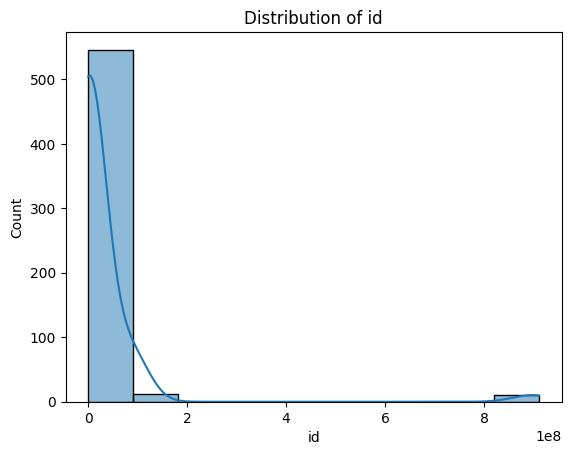

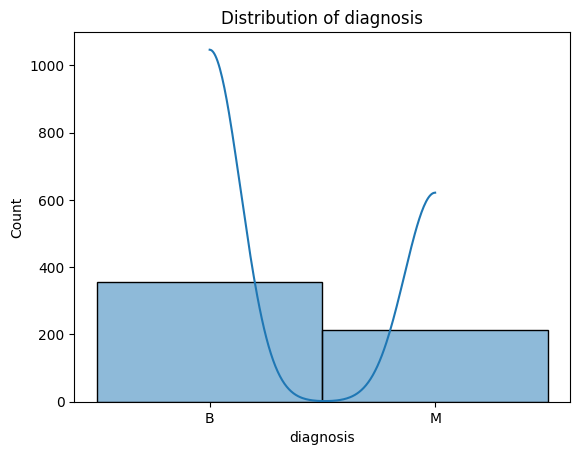

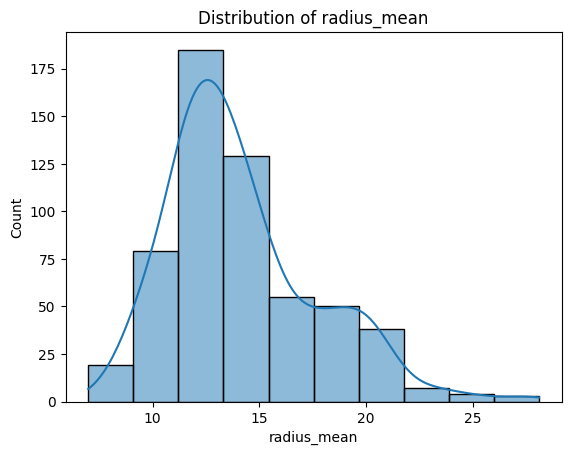

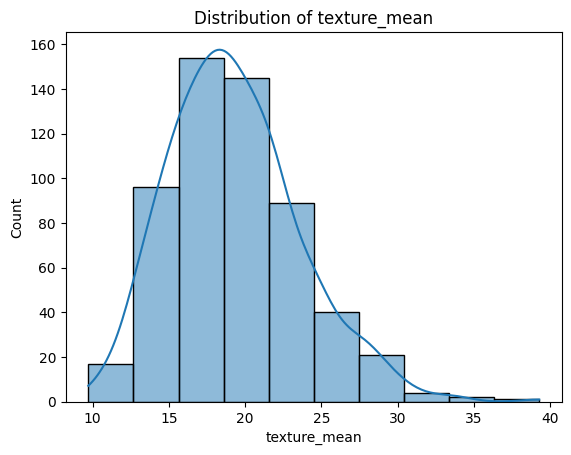

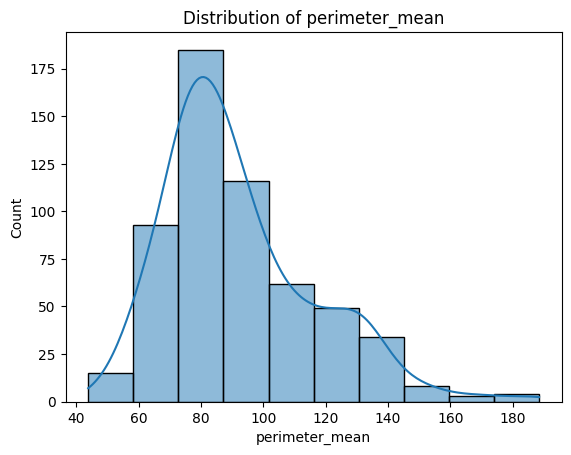

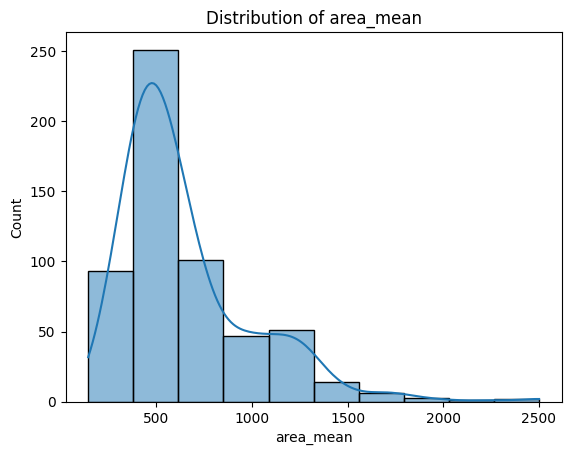

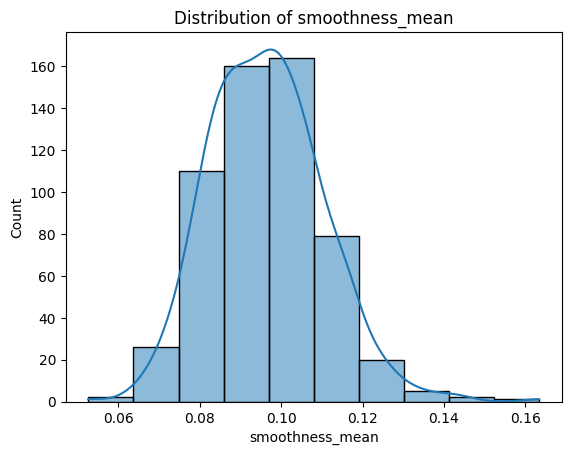

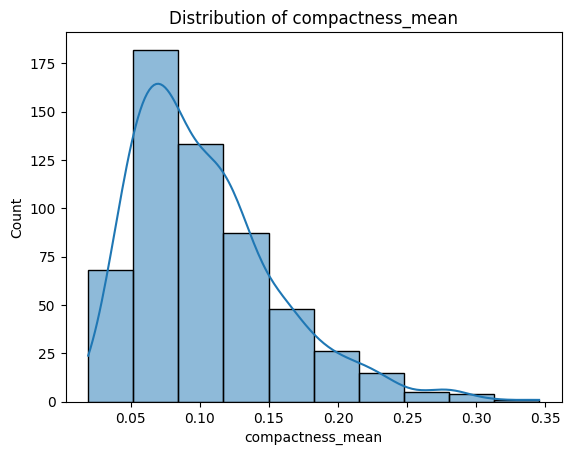

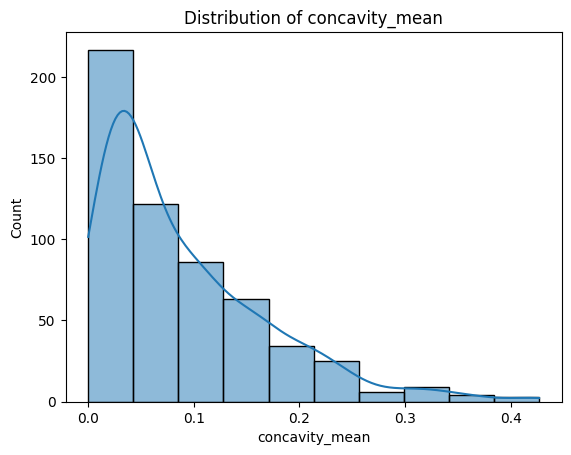

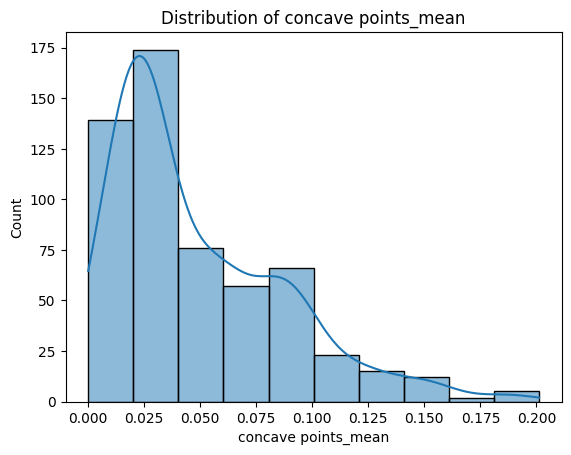

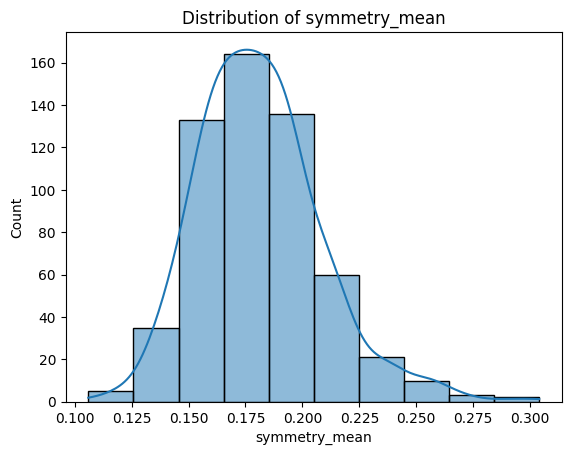

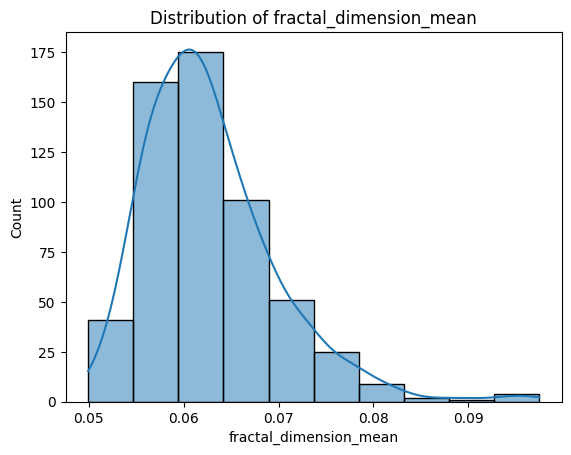

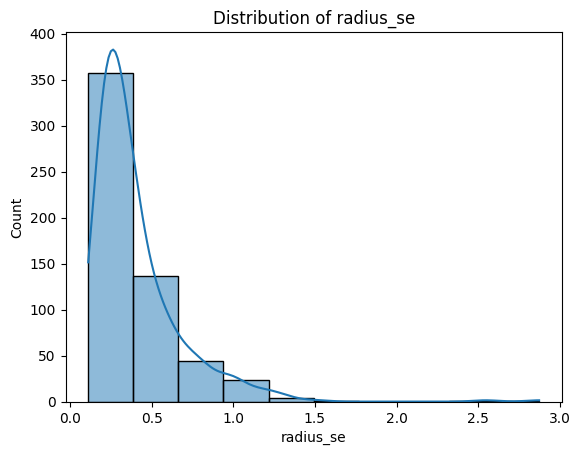

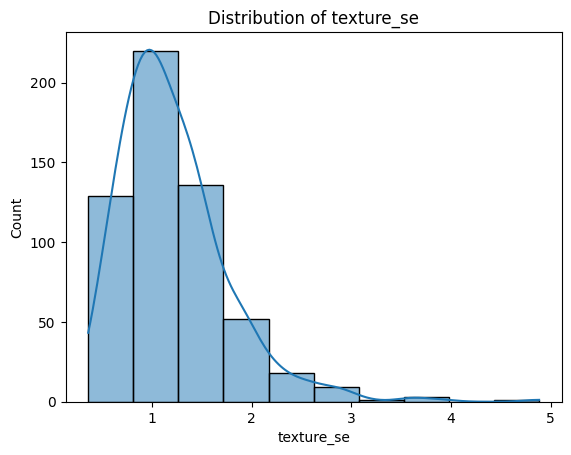

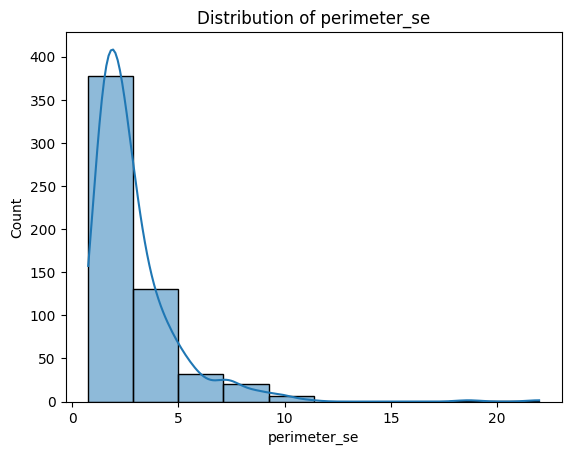

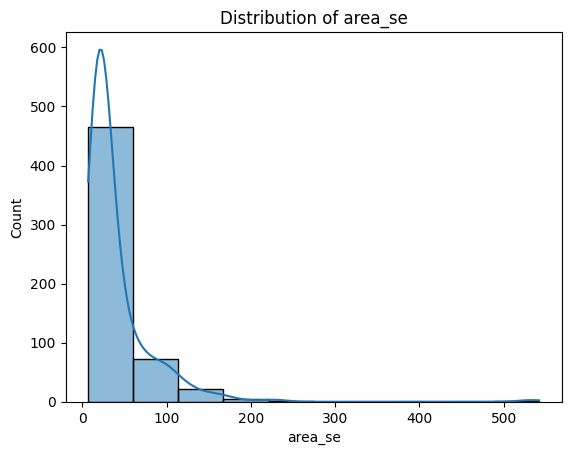

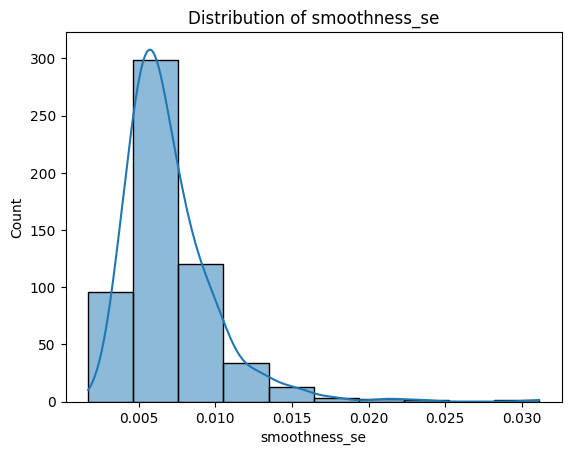

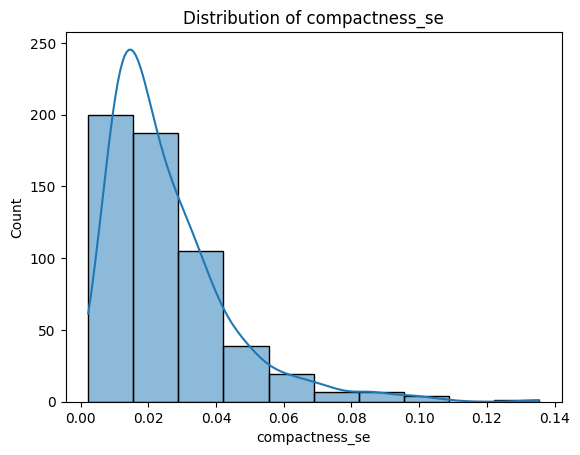

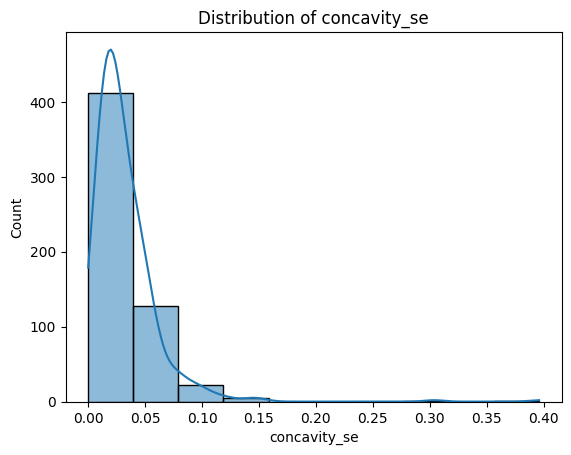

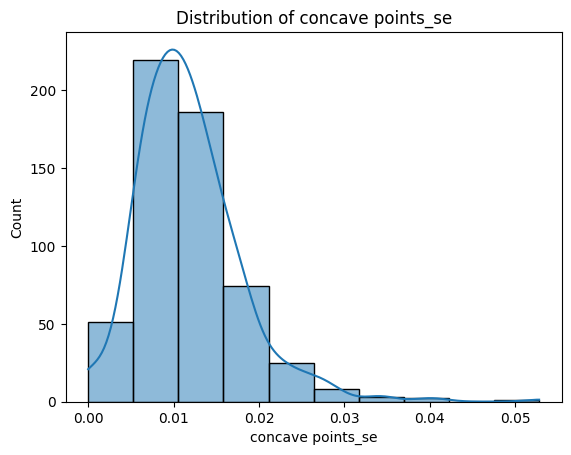

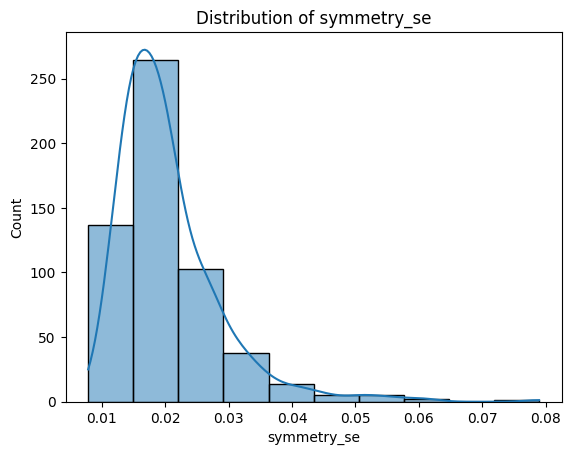

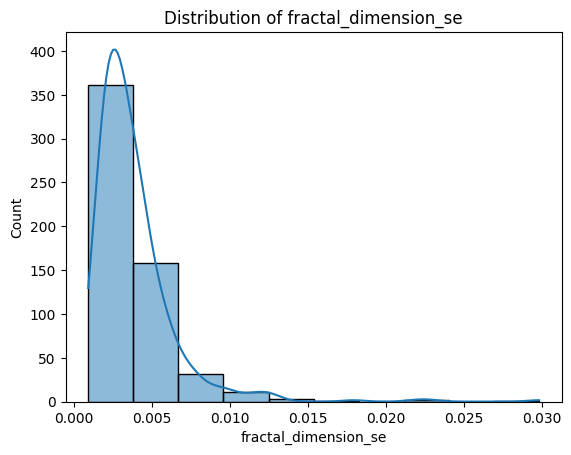

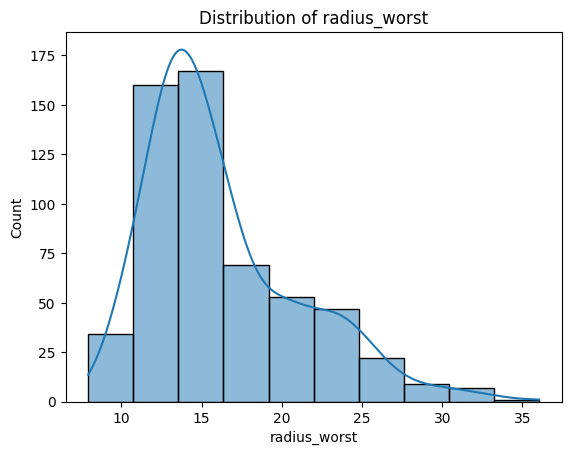

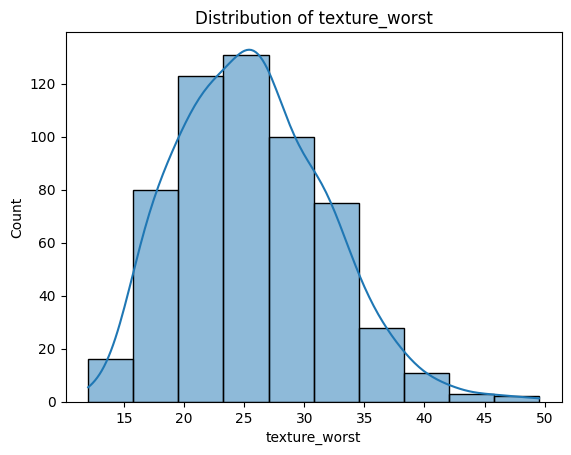

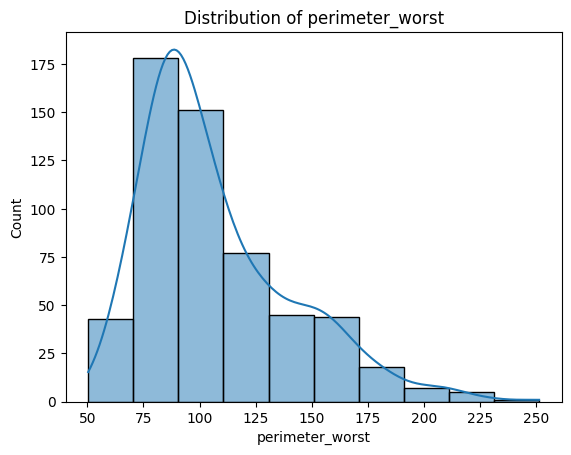

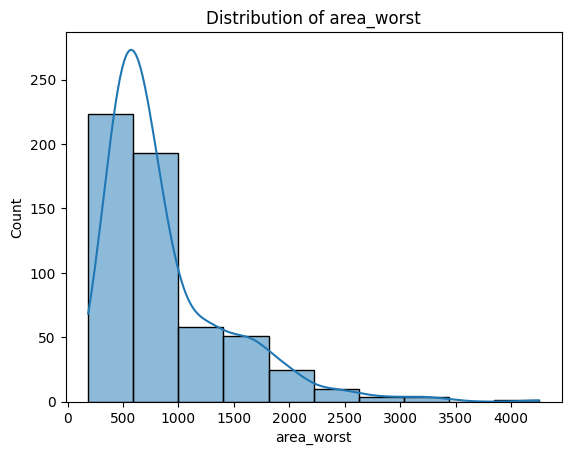

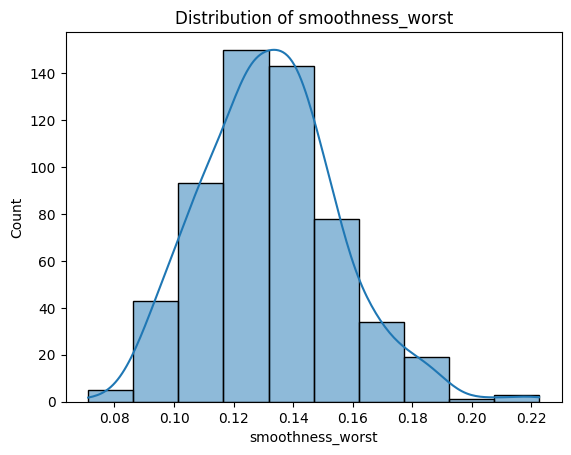

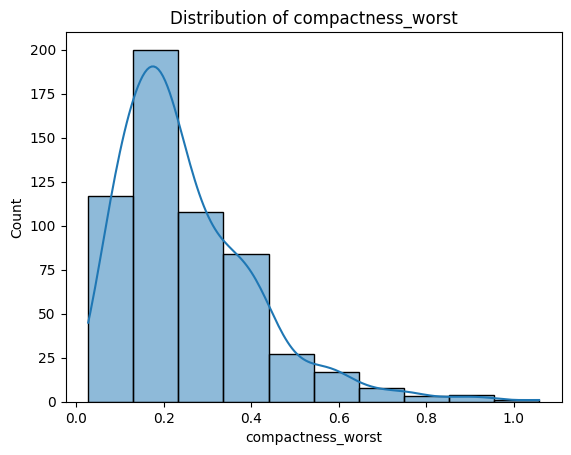

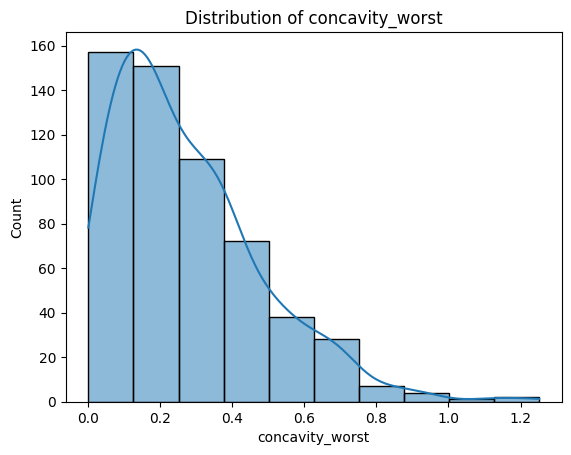

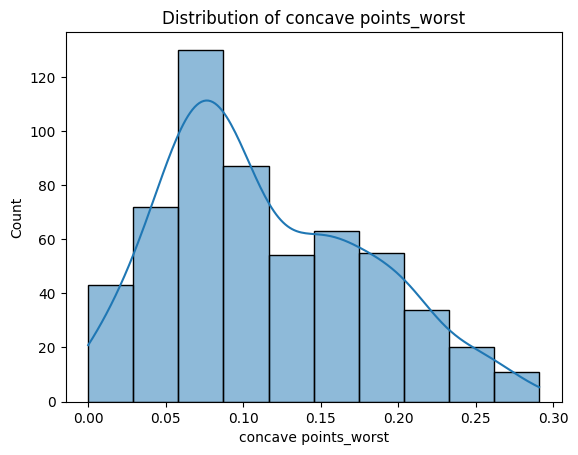

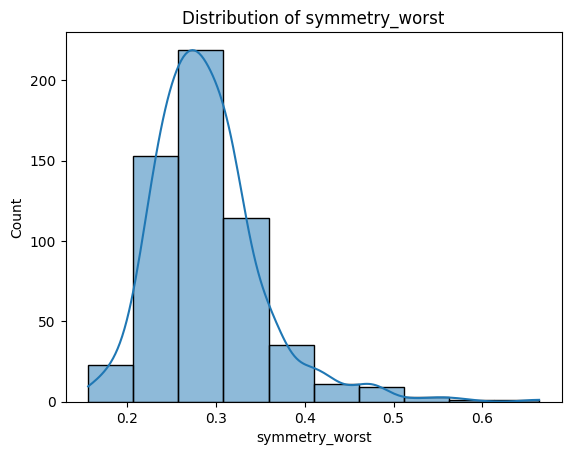

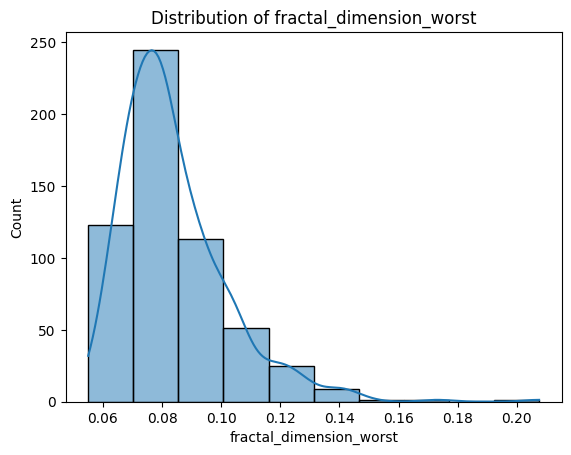

In [15]:
for column_name, column_data in cancer_df.iteritems():
    plt.title(f'Distribution of {column_name}')
    sns.histplot(x=column_data, kde=True, bins=10)
    plt.show()

<Axes: >

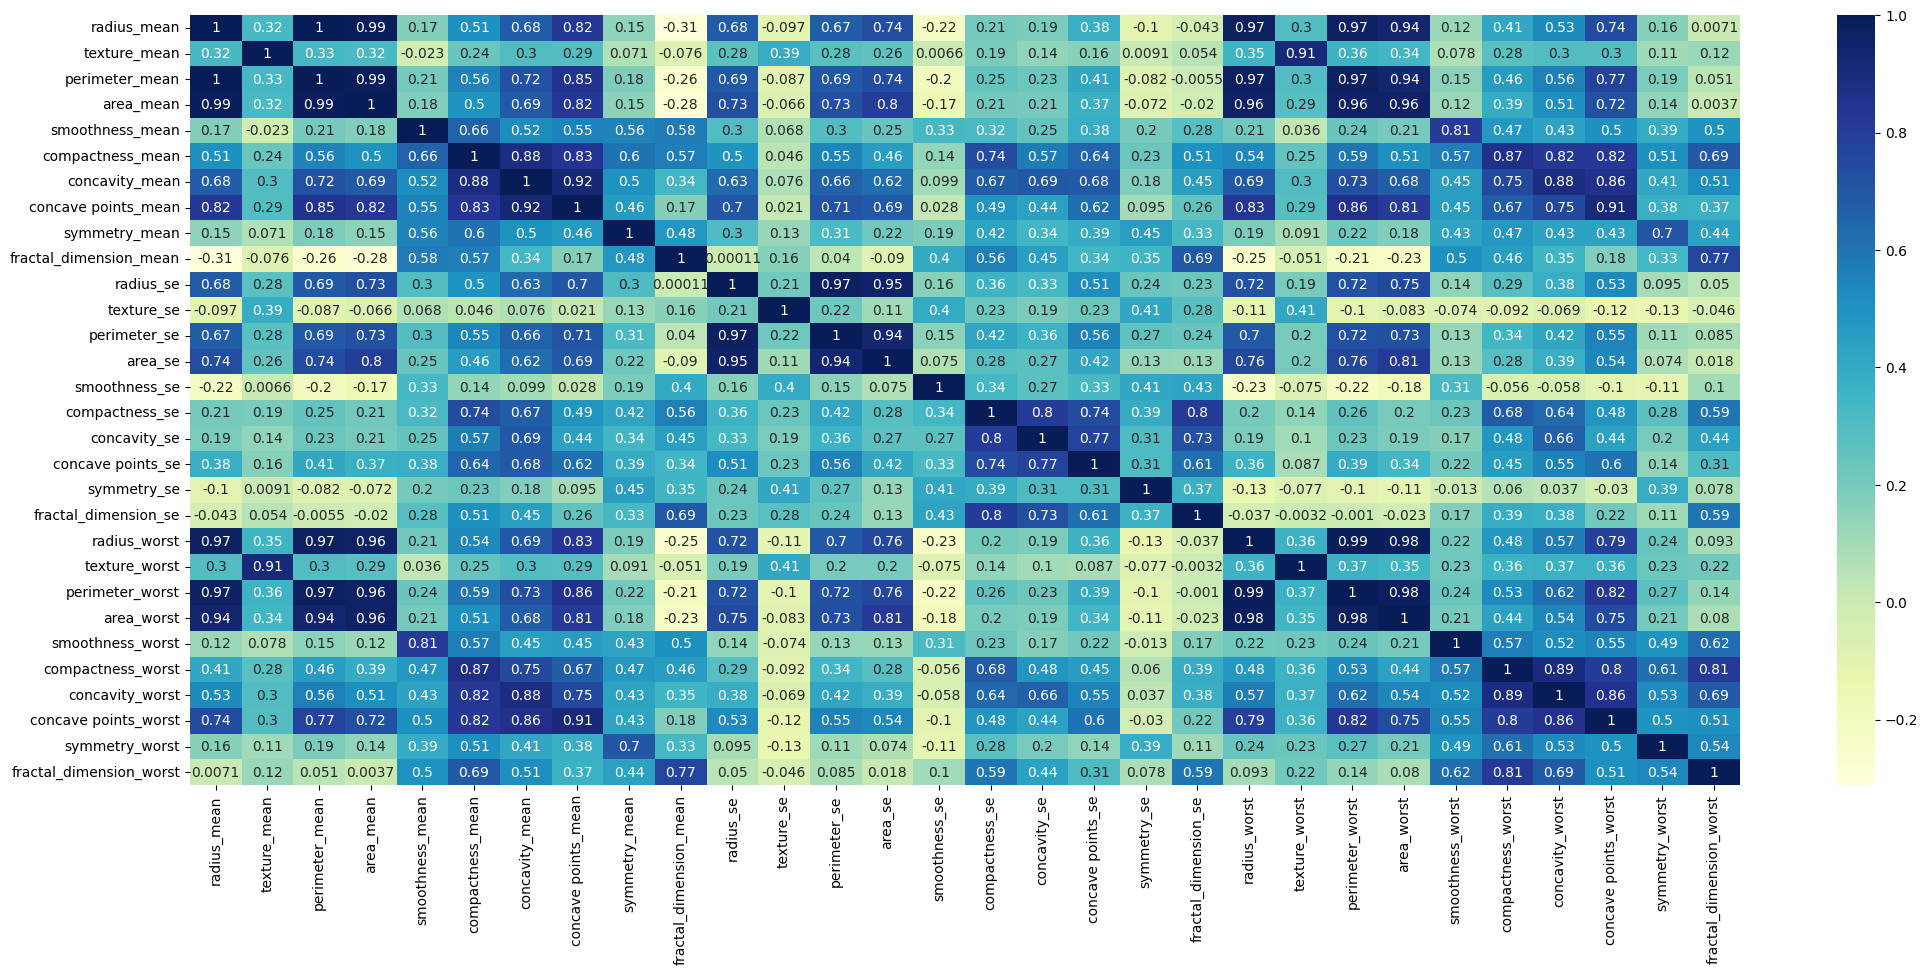

In [16]:
plt.rcParams['figure.figsize']=(25,10)
# In co relation 1 is the highest and -1 is lowest
sns.heatmap (cancer_df.drop('diagnosis',axis =1).drop('id',axis =1).corr(),cmap = 'YlGnBu',annot = True)

The only negative correlation can be observed for:
radius_mean,texture_se,fractal_dimension_se,symmetry_se,smoothness_se,fractal_dimension_mean.

<Axes: xlabel='diagnosis', ylabel='count'>

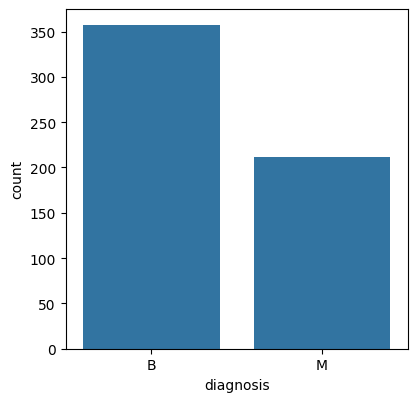

In [17]:
plt.figure(figsize=(15,15))

plt.subplot(3,3,1)
sns.countplot(x='diagnosis', data = cancer_df)

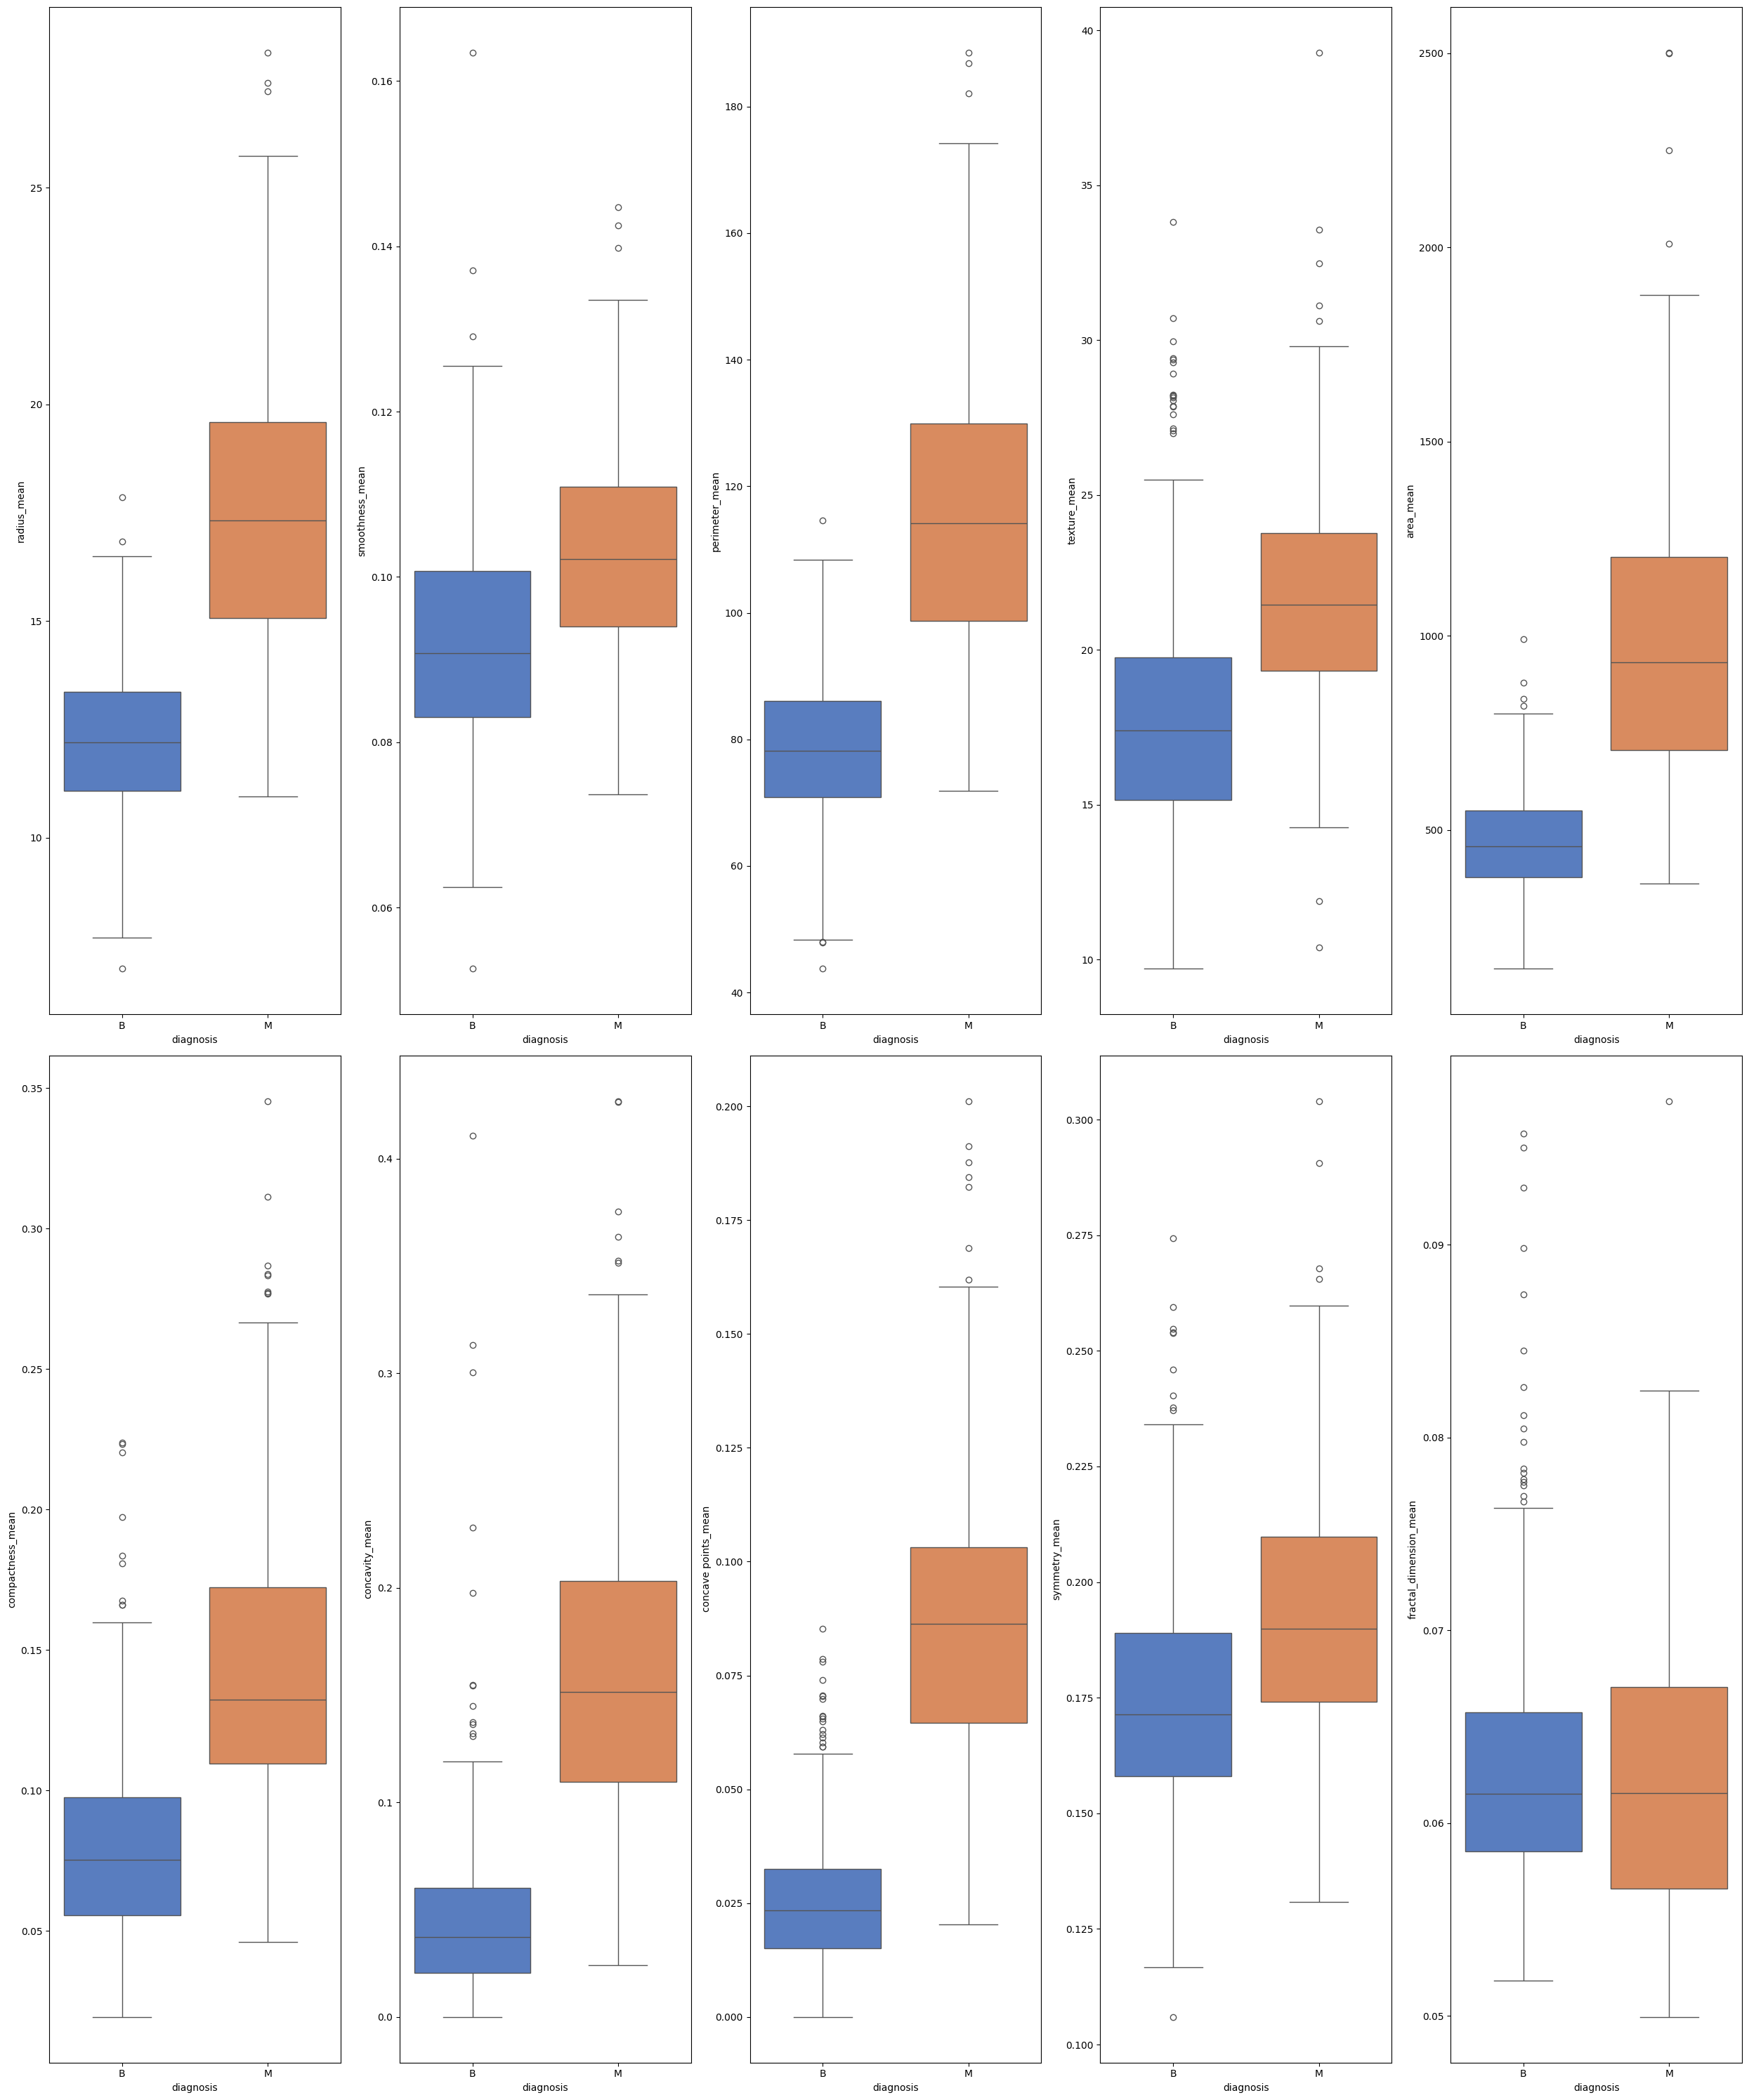

In [18]:
# Creating subplots for the first set of boxplots
f, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10)) = plt.subplots(2, 5, figsize=(25, 30))

# Plotting boxplots for the first set of features
sns.boxplot(x='diagnosis', y='radius_mean', data=cancer_df, ax=ax1,palette = 'muted')
sns.boxplot(x='diagnosis', y='smoothness_mean', data=cancer_df, ax=ax2,palette = 'muted')
sns.boxplot(x='diagnosis', y='perimeter_mean', data=cancer_df, ax=ax3,palette = 'muted')
sns.boxplot(x='diagnosis', y='texture_mean', data=cancer_df, ax=ax4,palette = 'muted')
sns.boxplot(x='diagnosis', y='area_mean', data=cancer_df, ax=ax5,palette = 'muted')

# Plotting boxplots for the second set of features
sns.boxplot(x='diagnosis', y='compactness_mean', data=cancer_df, ax=ax6,palette = 'muted')
sns.boxplot(x='diagnosis', y='concavity_mean', data=cancer_df, ax=ax7,palette = 'muted')
sns.boxplot(x='diagnosis', y='concave points_mean', data=cancer_df, ax=ax8,palette = 'muted')
sns.boxplot(x='diagnosis', y='symmetry_mean', data=cancer_df, ax=ax9,palette = 'muted')
sns.boxplot(x='diagnosis', y='fractal_dimension_mean', data=cancer_df, ax=ax10,palette = 'muted')

# Adjusting layout
plt.tight_layout()

# Showing the plot
plt.show()




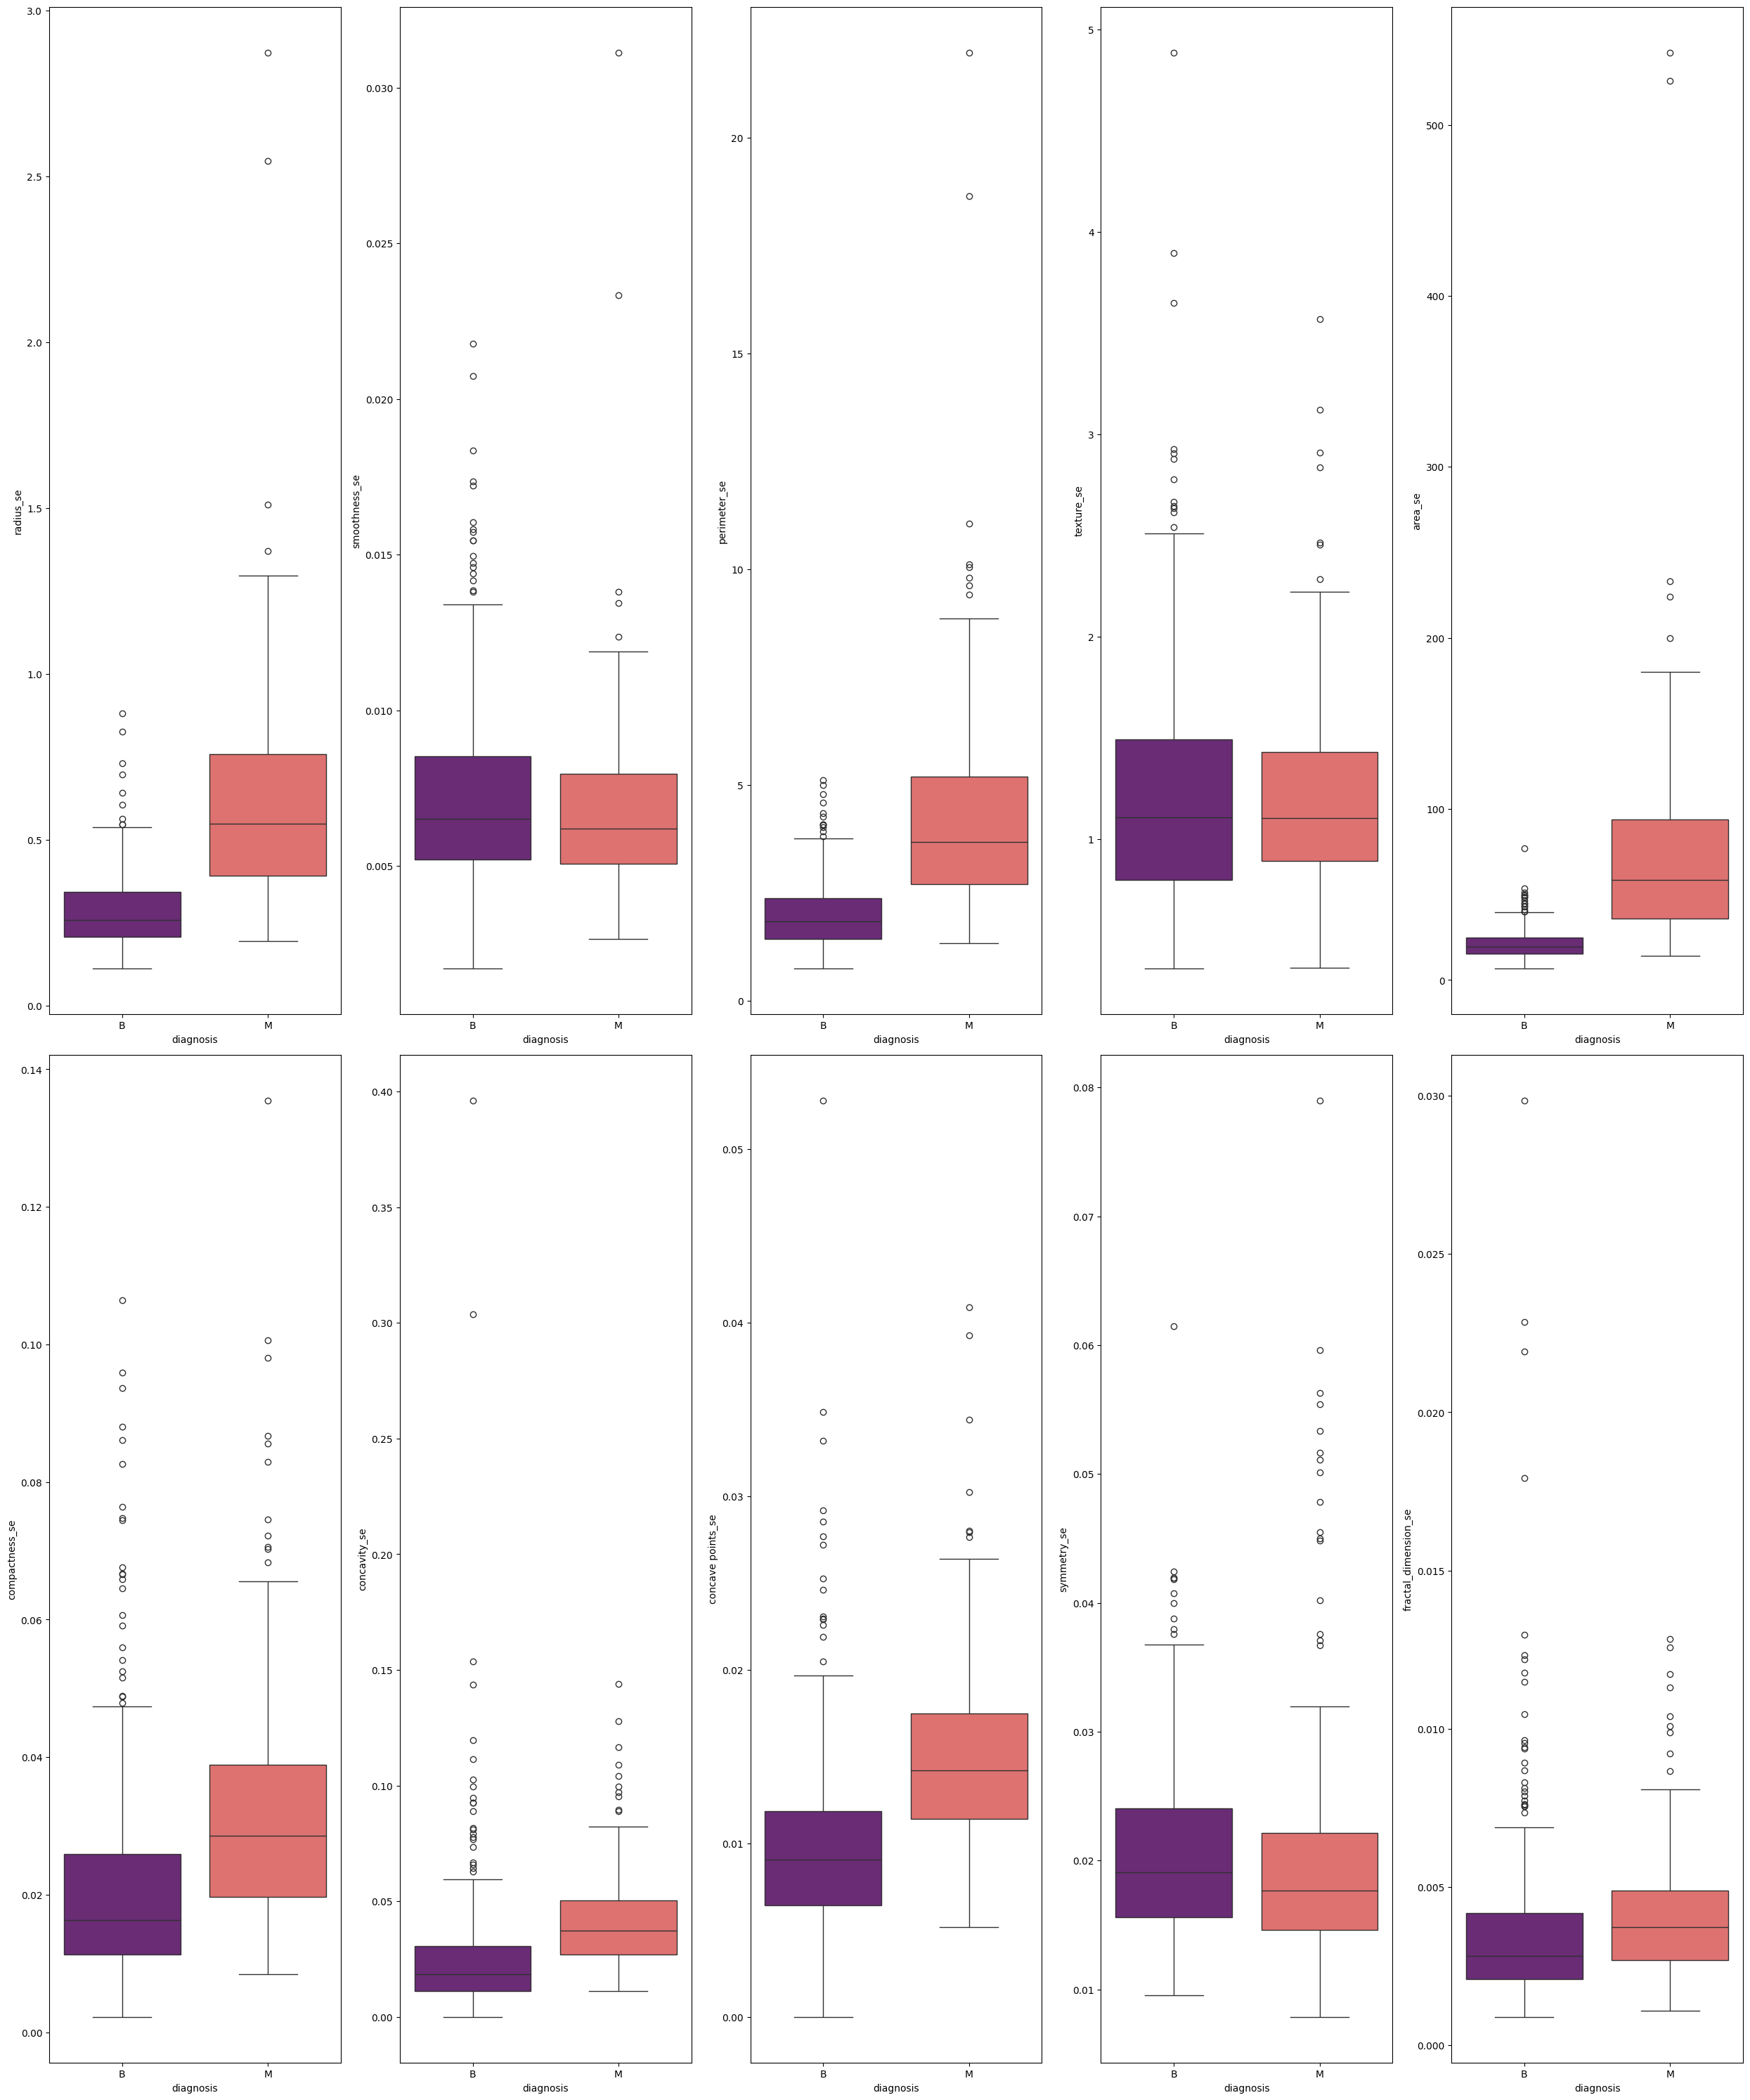

In [19]:
# Creating subplots for the first set of boxplots
f, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10)) = plt.subplots(2, 5, figsize=(25, 30))

# Plotting boxplots for the first set of features
sns.boxplot(x='diagnosis', y='radius_se', data=cancer_df, ax=ax1,palette = 'magma')
sns.boxplot(x='diagnosis', y='smoothness_se', data=cancer_df, ax=ax2,palette = 'magma')
sns.boxplot(x='diagnosis', y='perimeter_se', data=cancer_df, ax=ax3,palette = 'magma')
sns.boxplot(x='diagnosis', y='texture_se', data=cancer_df, ax=ax4,palette = 'magma')
sns.boxplot(x='diagnosis', y='area_se', data=cancer_df, ax=ax5,palette = 'magma')

# Plotting boxplots for the second set of features
sns.boxplot(x='diagnosis', y='compactness_se', data=cancer_df, ax=ax6,palette = 'magma')
sns.boxplot(x='diagnosis', y='concavity_se', data=cancer_df, ax=ax7,palette = 'magma')
sns.boxplot(x='diagnosis', y='concave points_se', data=cancer_df, ax=ax8,palette = 'magma')
sns.boxplot(x='diagnosis', y='symmetry_se', data=cancer_df, ax=ax9,palette = 'magma')
sns.boxplot(x='diagnosis', y='fractal_dimension_se', data=cancer_df, ax=ax10,palette = 'magma')

# Adjusting layout
plt.tight_layout()

# Showing the plot
plt.show()

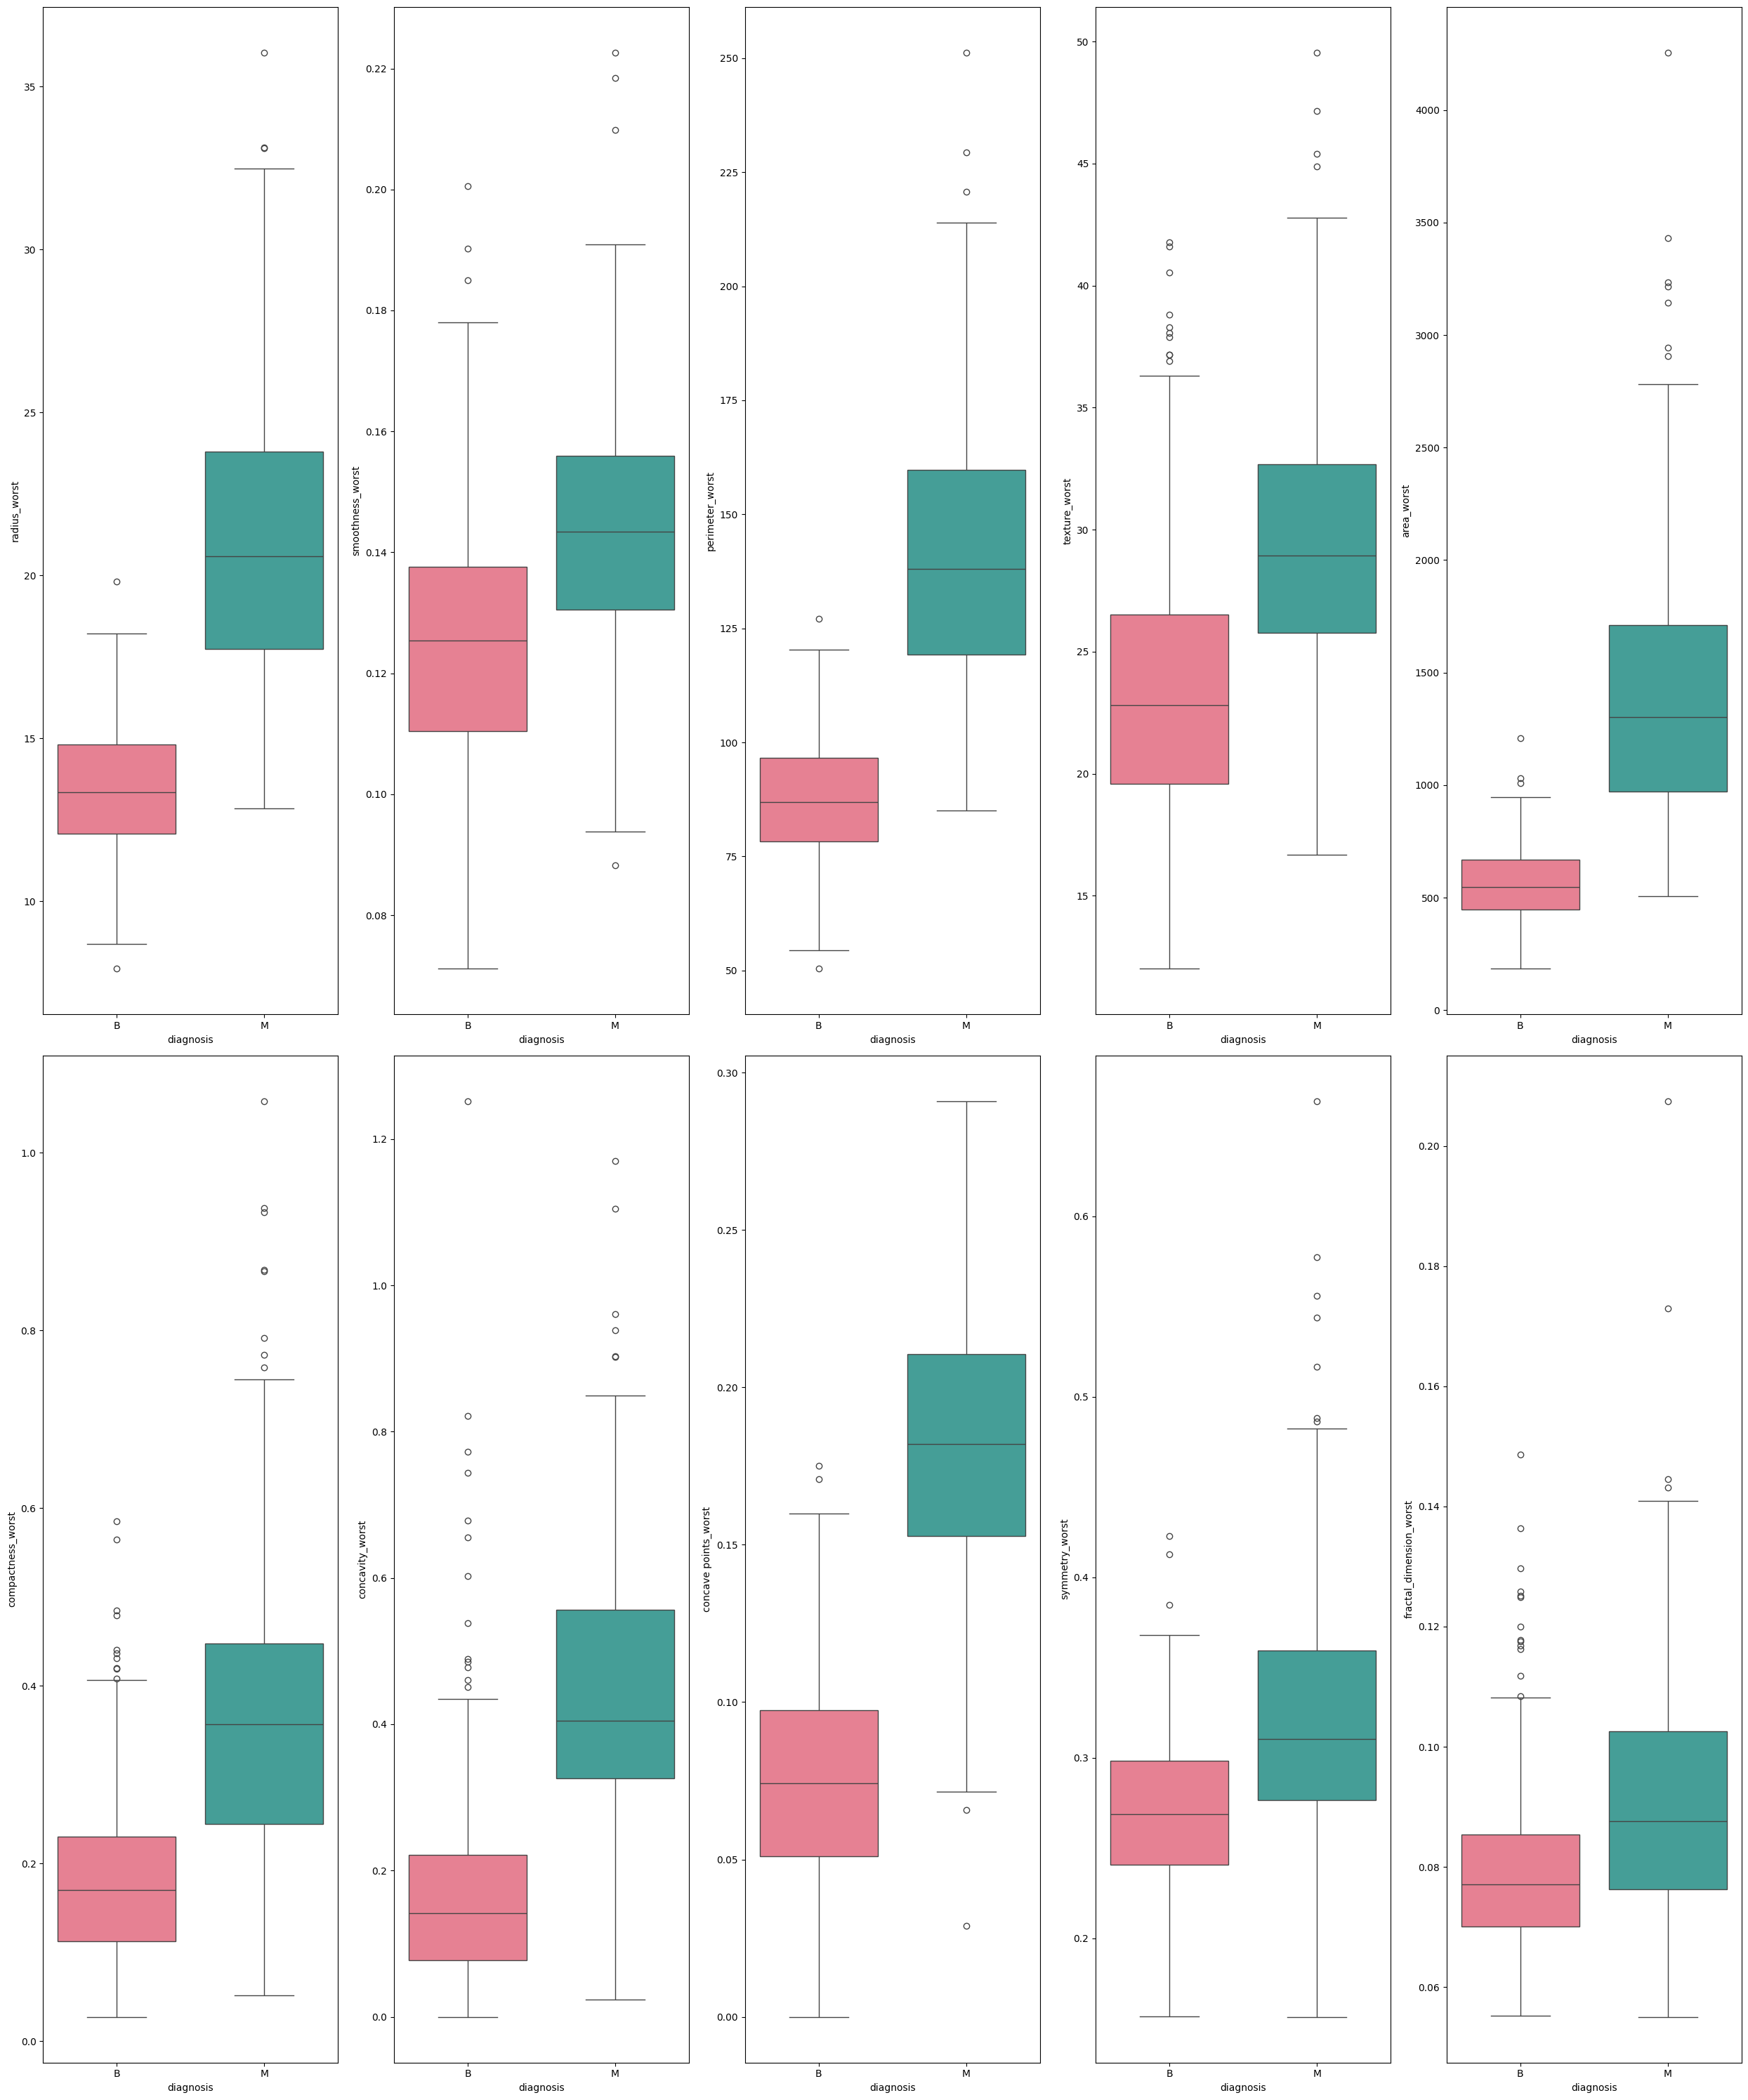

In [20]:
# Creating subplots for the first set of boxplots
f, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10)) = plt.subplots(2, 5, figsize=(25, 30))

# Plotting boxplots for the first set of features
sns.boxplot(x='diagnosis', y='radius_worst', data=cancer_df, ax=ax1,palette = 'husl')
sns.boxplot(x='diagnosis', y='smoothness_worst', data=cancer_df, ax=ax2,palette = 'husl')
sns.boxplot(x='diagnosis', y='perimeter_worst', data=cancer_df, ax=ax3,palette = 'husl')
sns.boxplot(x='diagnosis', y='texture_worst', data=cancer_df, ax=ax4,palette = 'husl')
sns.boxplot(x='diagnosis', y='area_worst', data=cancer_df, ax=ax5,palette = 'husl')

# Plotting boxplots for the second set of features
sns.boxplot(x='diagnosis', y='compactness_worst', data=cancer_df, ax=ax6,palette = 'husl')
sns.boxplot(x='diagnosis', y='concavity_worst', data=cancer_df, ax=ax7,palette = 'husl')
sns.boxplot(x='diagnosis', y='concave points_worst', data=cancer_df, ax=ax8,palette = 'husl')
sns.boxplot(x='diagnosis', y='symmetry_worst', data=cancer_df, ax=ax9,palette = 'husl')
sns.boxplot(x='diagnosis', y='fractal_dimension_worst', data=cancer_df, ax=ax10,palette = 'husl')

# Adjusting layout
plt.tight_layout()

# Showing the plot
plt.show()

Normalising and Splitting the data

In [21]:
x_norm = df_norm.drop (labels= 'diagnosis', axis =1 )
y_norm = df_norm ['diagnosis']
col = x_norm. columns
print (col)

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(x_norm, y_norm, test_size = 0.2, random_state = 0)

In [23]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Models

# Logistic Regression

In [24]:
#Using Logistic Regression Algorithm to the Training Set
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
print (f"The Accuracy Score is: {(accuracy_score(Y_test,Y_pred))}")
print(f"The confusion matrix is:\n{cm}")
print(f"The classification report is:\n{classification_report(Y_test, Y_pred)}")

The Accuracy Score is: 0.9649122807017544
The confusion matrix is:
[[65  2]
 [ 2 45]]
The classification report is:
              precision    recall  f1-score   support

           B       0.97      0.97      0.97        67
           M       0.96      0.96      0.96        47

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



# SVC Algortihm

In [25]:
#Using SVC method of svm class to use Support Vector Machine Algorithm
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
print (f"The Accuracy Score is: {(accuracy_score(Y_test,Y_pred))}")
print(f"The confusion matrix is:\n{cm}")
print(f"The classification report is:\n{classification_report(Y_test, Y_pred)}")

The Accuracy Score is: 0.9649122807017544
The confusion matrix is:
[[65  2]
 [ 2 45]]
The classification report is:
              precision    recall  f1-score   support

           B       0.97      0.97      0.97        67
           M       0.96      0.96      0.96        47

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



Nearest Neighbor algorithm

In [26]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
print (f"The Accuracy Score is: {(accuracy_score(Y_test,Y_pred))}")
print(f"The confusion matrix is:\n{cm}")
print(f"The classification report is:\n{classification_report(Y_test, Y_pred)}")

The Accuracy Score is: 0.956140350877193
The confusion matrix is:
[[67  0]
 [ 5 42]]
The classification report is:
              precision    recall  f1-score   support

           B       0.93      1.00      0.96        67
           M       1.00      0.89      0.94        47

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



Kernel SVM Algorithm

In [27]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
print (f"The Accuracy Score is: {(accuracy_score(Y_test,Y_pred))}")
print(f"The confusion matrix is:\n{cm}")
print(f"The classification report is:\n{classification_report(Y_test, Y_pred)}")

The Accuracy Score is: 0.9736842105263158
The confusion matrix is:
[[66  1]
 [ 2 45]]
The classification report is:
              precision    recall  f1-score   support

           B       0.97      0.99      0.98        67
           M       0.98      0.96      0.97        47

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



Naïve Bayes Algorithm

In [28]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
print (f"The Accuracy Score is: {(accuracy_score(Y_test,Y_pred))}")
print(f"The confusion matrix is:\n{cm}")
print(f"The classification report is:\n{classification_report(Y_test, Y_pred)}")

The Accuracy Score is: 0.9122807017543859
The confusion matrix is:
[[61  6]
 [ 4 43]]
The classification report is:
              precision    recall  f1-score   support

           B       0.94      0.91      0.92        67
           M       0.88      0.91      0.90        47

    accuracy                           0.91       114
   macro avg       0.91      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114



Decision Tree Algorithm

In [29]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
print (f"The Accuracy Score is: {(accuracy_score(Y_test,Y_pred))}")
print(f"The confusion matrix is:\n{cm}")
print(f"The classification report is:\n{classification_report(Y_test, Y_pred)}")

The Accuracy Score is: 0.9210526315789473
The confusion matrix is:
[[62  5]
 [ 4 43]]
The classification report is:
              precision    recall  f1-score   support

           B       0.94      0.93      0.93        67
           M       0.90      0.91      0.91        47

    accuracy                           0.92       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114



Random Forest Classification algorithm

In [30]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
print (f"The Accuracy Score is: {(accuracy_score(Y_test,Y_pred))}")
print(f"The confusion matrix is:\n{cm}")
print(f"The classification report is:\n{classification_report(Y_test, Y_pred)}")

The Accuracy Score is: 0.9649122807017544
The confusion matrix is:
[[66  1]
 [ 3 44]]
The classification report is:
              precision    recall  f1-score   support

           B       0.96      0.99      0.97        67
           M       0.98      0.94      0.96        47

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



XGBoost Classifier

In [31]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
sm = SMOTE(random_state =42)
sm = SMOTE(random_state =42)
X_res, Y_res = sm.fit_resample (x_norm, y_norm)
X_train, X_test, Y_train, Y_test = train_test_split (X_res,Y_res,test_size = 0.2)
classifier = XGBClassifier()
# labelling
label_encoder = LabelEncoder()

# Fitting and transform the target variable Y_train
Y_train_encoded = label_encoder.fit_transform(Y_train)
classifier.fit(X_train, Y_train_encoded)
# Predicting on the test data
Y_pred = classifier.predict(X_test)
Y_pred_str = label_encoder.inverse_transform(Y_pred)

# Predicting on the test data
cm = confusion_matrix(Y_test, Y_pred_str)
print (f"The Accuracy Score is: {(accuracy_score(Y_test,Y_pred_str))}")
print(f"The confusion matrix is:\n{cm}")
print(f"The classification report is:\n{classification_report(Y_test, Y_pred_str)}")


The Accuracy Score is: 0.9790209790209791
The confusion matrix is:
[[77  0]
 [ 3 63]]
The classification report is:
              precision    recall  f1-score   support

           B       0.96      1.00      0.98        77
           M       1.00      0.95      0.98        66

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

